In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def display_image(image_array, title='', cmap='gray'):
    """Отображает изображение с помощью matplotlib"""
    plt.figure(figsize=(8, 6))
    plt.imshow(image_array, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_images(image_arrays, titles=None, cols=3, cmap='gray', figsize=(15, 10)):
    """
    Отображает несколько изображений в виде сетки.

    Параметры:
        image_arrays : list of numpy.ndarray
            Список массивов изображений (в формате HWC или HW).
        titles : list of str, optional
            Заголовки для каждого изображения (должен совпадать с image_arrays по длине).
        cols : int, optional
            Количество столбцов в сетке (по умолчанию 3).
        cmap : str, optional
            Цветовая карта (по умолчанию 'gray' для ч/б изображений).
        figsize : tuple, optional
            Размер фигуры (ширина, высота) в дюймах (по умолчанию (15, 10)).
    """
    if not isinstance(image_arrays, (list, np.ndarray)):
        raise ValueError("image_arrays должен быть списком или массивом numpy.")

    if titles is not None and len(titles) != len(image_arrays):
        raise ValueError("Количество заголовков должно совпадать с количеством изображений.")
    rows = int(np.ceil(len(image_arrays) / cols))
    plt.figure(figsize=figsize)
    for i, image in enumerate(image_arrays):
        plt.subplot(rows, cols, i + 1)

        # Если изображение цветное (3 канала) и cmap='gray', игнорируем cmap
        if len(image.shape) == 3 and image.shape[-1] == 3 and cmap == 'gray':
            plt.imshow(image)
        else:
            plt.imshow(image, cmap=cmap)

        if titles is not None:
            plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def image_to_CGarrays(image_str:str):
    imC = cv2.imread(image_str, cv2.IMREAD_COLOR_RGB)
    imG = cv2.imread(image_str, cv2.IMREAD_GRAYSCALE)
    return imC, imG


def add_gaussian_noise(image, mean=0, sigma=25):
    """
    Добавляет гауссовский шум к изображению.
    Параметры:
        image : numpy.ndarray
            Входное изображение (BGR или Grayscale).
        mean : float, optional
            Среднее значение шума (по умолчанию 0).
        sigma : float, optional
            Стандартное отклонение шума (по умолчанию 25).

    Возвращает:
        numpy.ndarray
            Зашумленное изображение того же типа, что и входное.
    """
    noise = np.random.normal(mean, sigma, image.shape).astype(np.int16) # astype(np.int16) позволяет избежать переполнения при сложении.
    noisy_image = image.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8) # astype(np.uint8) возвращает изображение в стандартном формате.
    # noisy_image = noisy_image.astype(np.ndarray)
    return noisy_image


In [22]:
imC, imG = image_to_CGarrays("img/peizaj.jpg")
print(imC.shape)

(733, 1100, 3)


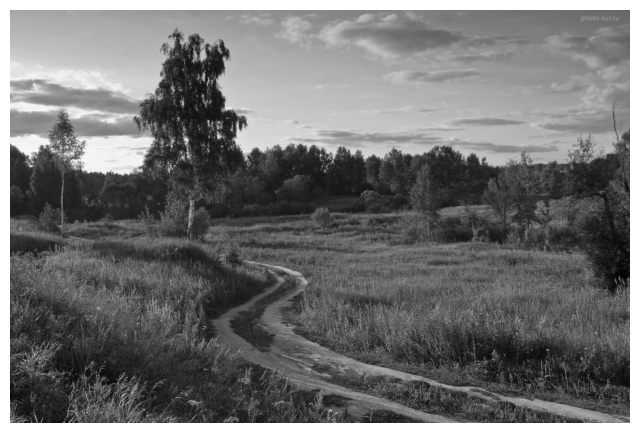

In [28]:
# # Создаём красный квадрат (в BGR)
# red_image = np.zeros((160, 160, 3), dtype=np.uint8)
# red_image[:, :] = [255, 0, 0]  # Заполняем красным (BGR)
display_image(imG)


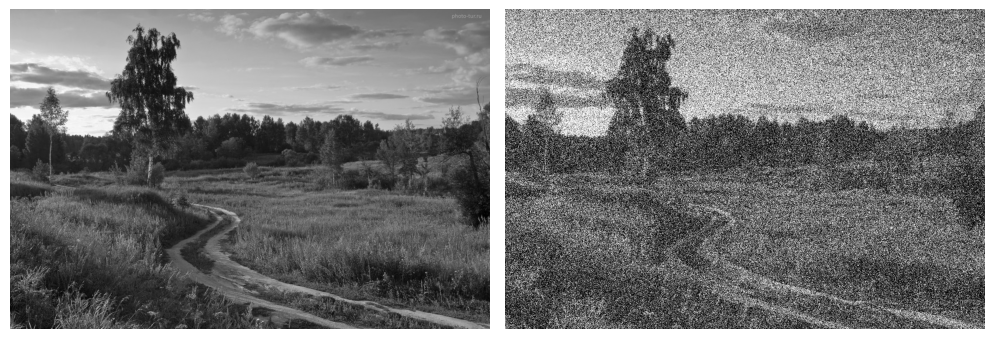

In [49]:
noize_imgG = add_gaussian_noise(imG, 5, 110)
display_images([imG, noize_imgG])

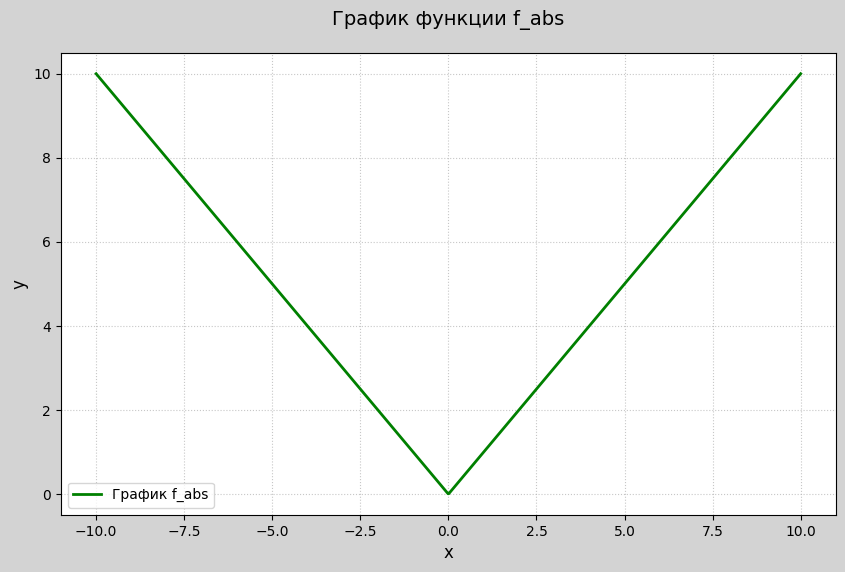

In [58]:
def f_abs(x):
    return np.abs(x)

def draw_plot(func, x_min=-10, x_max=10, num_points=1000, line_color='blue', line_style='-', bg_color='white'):
    """
    Рисует график с настраиваемыми цветами и стилями.

    Параметры:
    - func: функция для рисования (например, lambda x: x**2)
    - x_min, x_max: диапазон x
    - num_points: количество точек
    - line_color: цвет линии ('red', 'green', '#FF00FF' и т. д.)
    - line_style: стиль линии ('-', '--', ':', '-.')
    - bg_color: цвет фона графика
    """
    x = np.linspace(x_min, x_max, num_points)
    y = func(x)

    # Создаем фигуру с заданным фоном
    plt.figure(figsize=(10, 6), facecolor='lightgray')  # Фон вокруг графика

    # Рисуем график с заданными параметрами линии
    plt.plot(x, y,
             color=line_color,
             linestyle=line_style,
             linewidth=2,
             label=f'График {func.__name__}')

    # Настраиваем фон внутри осей
    ax = plt.gca()
    ax.set_facecolor(bg_color)  # Фон области графика

    # Добавляем подписи
    plt.title(f'График функции {func.__name__}', fontsize=14, pad=20)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)

    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.7)  # Сетка с пунктиром

    plt.show()
draw_plot(f_abs, line_color='green', line_style='-', bg_color='white')